<a href="https://colab.research.google.com/github/netomap/Numbers_classification/blob/master/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from PIL import Image

In [2]:
print ('versão do tensor: {}'.format(tf.__version__))

versão do tensor: 2.2.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [19]:
#diretorio = 'C:/Users/manuel/Documents/GitHub/Numbers_classification/numbers'
diretorio = '/content/drive/My Drive/Colab Notebooks/Number_classifications/numbers2'
data_dir = pathlib.Path(diretorio)

lista = list(data_dir.glob('*/*.png'))
print ("Total de números: {}".format(len(lista)))

pastas = list(data_dir.glob('*'))
class_names = np.array([item.name for item in pastas if item.name != 'digitos.pde'])
print (class_names)

Total de números: 800
['6' '1' '2' '8' '7' '4' '5' '9' '3' '0']


In [34]:
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split=0.1)

tamanho = (50, 50)

train_data = image_generator.flow_from_directory(
    directory = diretorio,
    target_size = tamanho,
    batch_size = 40,
    shuffle = True,
    classes = list(class_names),
    subset = 'training'
)

validation_data = image_generator.flow_from_directory(
    directory = diretorio,
    target_size = tamanho,
    shuffle = True,
    classes = list(class_names),
    subset = 'validation'
)

Found 724 images belonging to 10 classes.
Found 76 images belonging to 10 classes.


In [35]:
TRAIN_STEPS = train_data.n // train_data.batch_size
VALIDATION_STEPS = validation_data.n // validation_data.batch_size

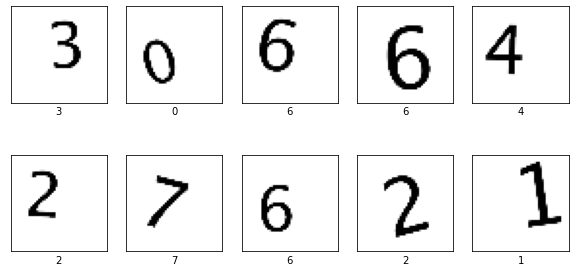

In [23]:
# desenhando algumas imagens do treino
plt.figure(figsize=(10,5))
images_batch, labels_batch = next(train_data)
for k in range(10):
    plt.subplot(2, 5, k+1)
    plt.imshow(images_batch[k])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(np.argmax(labels_batch[k]))
plt.show()

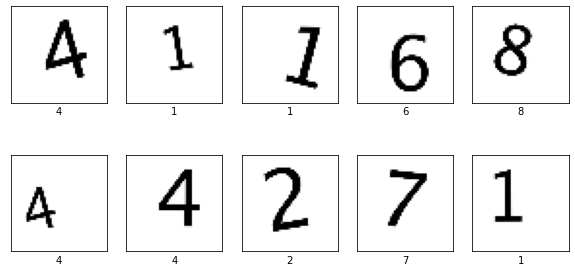

In [14]:
# desenhando algumas imagens da validação
plt.figure(figsize=(10,5))
images_batch, labels_batch = next(validation_data)
for k in range(10):
    plt.subplot(2, 5, k+1)
    plt.imshow(images_batch[k])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(np.argmax(labels_batch[k]))
plt.show()

In [43]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 64, kernel_size=7, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=7))
model.add(keras.layers.Dropout(rate = 0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units = 128, activation='relu'))

model.add(keras.layers.Dense(units = 10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

parada_por_acuracia = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

In [44]:
model.fit_generator(
    generator = train_data,
    epochs = 20,
    steps_per_epoch=TRAIN_STEPS,
    validation_data=validation_data,
    validation_steps = VALIDATION_STEPS,
    callbacks = [parada_por_acuracia],
    verbose=1
)

Epoch 1/20
18/18 [==============================] - 1s 56ms/step - loss: 2.2958 - accuracy: 0.1711 - val_loss: 2.1820 - val_accuracy: 0.2656
Epoch 2/20
18/18 [==============================] - 1s 52ms/step - loss: 1.9486 - accuracy: 0.3933 - val_loss: 1.6007 - val_accuracy: 0.5781
Epoch 3/20
18/18 [==============================] - 1s 52ms/step - loss: 1.1877 - accuracy: 0.6784 - val_loss: 0.9881 - val_accuracy: 0.6562
Epoch 4/20
18/18 [==============================] - 1s 53ms/step - loss: 0.5479 - accuracy: 0.8582 - val_loss: 0.3386 - val_accuracy: 0.9531
Epoch 5/20
18/18 [==============================] - 1s 53ms/step - loss: 0.2396 - accuracy: 0.9488 - val_loss: 0.1763 - val_accuracy: 0.9844
Epoch 6/20
18/18 [==============================] - 1s 54ms/step - loss: 0.1681 - accuracy: 0.9605 - val_loss: 0.1493 - val_accuracy: 0.9844
Epoch 7/20
18/18 [==============================] - 1s 53ms/step - loss: 0.1001 - accuracy: 0.9781 - val_loss: 0.0712 - val_accuracy: 1.0000
Epoch 8/20
18

In [45]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           multiple                  9472      
_________________________________________________________________
max_pooling2d_10 (MaxPooling multiple                  0         
_________________________________________________________________
dropout_10 (Dropout)         multiple                  0         
_________________________________________________________________
flatten_9 (Flatten)          multiple                  0         
_________________________________________________________________
dense_18 (Dense)             multiple                  295040    
_________________________________________________________________
dense_19 (Dense)             multiple                  1290      
Total params: 305,802
Trainable params: 305,802
Non-trainable params: 0
________________________________________________

In [47]:
model.save('/content/drive/My Drive/Colab Notebooks/Number_classifications/numbers_model.h5')